In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# Data

In [12]:
df = pd.read_csv('SIGP_freight_data.csv',index_col=0, parse_dates=True)
df

,cargo,container
2007-01-31,2828.2,204.7
2007-02-28,2512.5,181.0
2007-03-31,2850.2,202.8
2007-04-30,3027.7,220.1
2007-05-31,3139.4,220.8
...,...,...
2022-10-31,4394.4,419.4
2022-11-30,4529.5,411.0
2022-12-31,4566.1,410.9
2023-01-31,4304.7,380.3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2007-01-31 to 2023-02-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cargo      194 non-null    float64
 1   container  194 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


## train valid test split

In [242]:
years = df.index.year
df_train = df.loc[years<=2020].copy()
df_valid = df.loc[years==2021].copy()

df_Train = df.loc[years<=2021].copy()
df_test = df.loc[years>=2022].copy()

 # Data Analysis

## visualtization

Text(0.5, 1.0, 'Shanghai_Cargo')

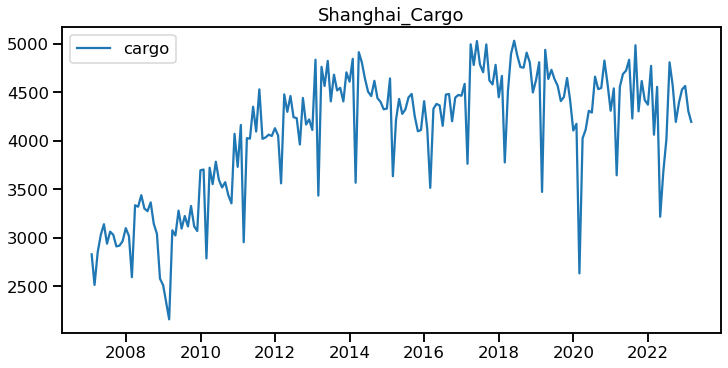

In [15]:
fig,ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df.index, df['cargo'],label='cargo')
ax.legend()
ax.set_title('Shanghai_Cargo')

## Stationary
ADF test<br>
H0: Non stationary exists in the series<br>
H1: Stationary exists in the series

In [253]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df_train['cargo'])
print(f"Statistic: {res[0]}")
print(f"p-value: {res[1]}")
print(f"1%: ", res[4]["1%"] )
print(f"5%: ", res[4]["5%"])
print(f"10%: ",res[4]["10%"] )


Statistic: -1.9529888798092645
p-value: 0.3075583280801924
1%:  -3.473542528196209
5%:  -2.880497674144038
10%:  -2.576878053634677


In [30]:
res[4].values()

dict_values([-3.4672111510631, -2.877734766803841, -2.575403364197531])

## Seasonailty

### EDA: 월별 계절성을 확인

In [254]:
df_train.head()

,cargo,container
2007-01-31,2828.2,204.7
2007-02-28,2512.5,181.0
2007-03-31,2850.2,202.8
2007-04-30,3027.7,220.1
2007-05-31,3139.4,220.8


In [255]:
df_train.index.max()

Timestamp('2020-12-31 00:00:00')

In [256]:
df_ = df_train.copy()
df_['month'] = df_.index.month

#### box_plot

<AxesSubplot:ylabel='cargo'>

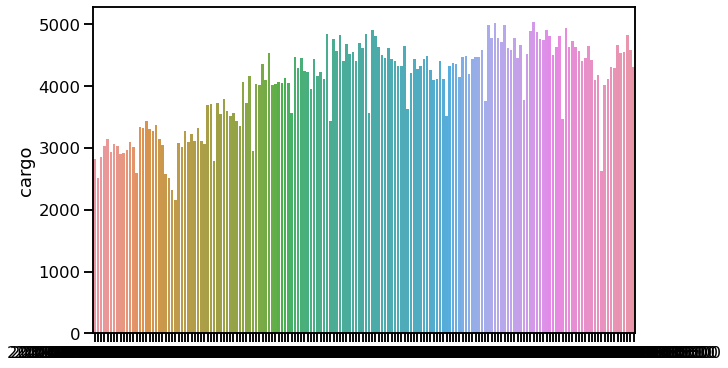

In [258]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.barplot(data=df_, x=df_.index, y='cargo')

(2000.0, 5000.0)

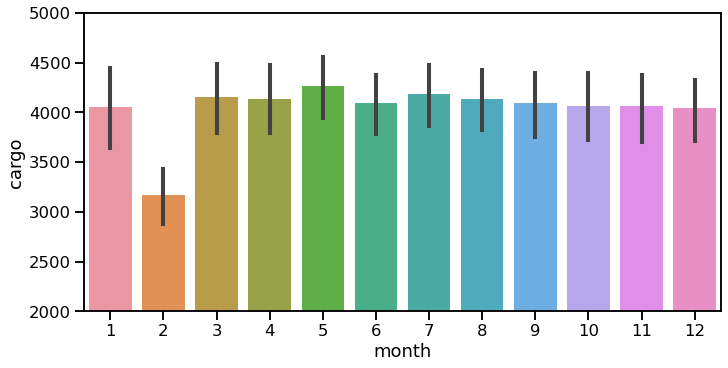

In [259]:
# 2월달에 하락 급격히 하락하는 모습을 보임
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.barplot(data=df_, x='month', y='cargo',ax=ax)
ax.set_ylim([2000,5000])

#### line plot

In [260]:
df_.head()

,cargo,container,month
2007-01-31,2828.2,204.7,1
2007-02-28,2512.5,181.0,2
2007-03-31,2850.2,202.8,3
2007-04-30,3027.7,220.1,4
2007-05-31,3139.4,220.8,5


Text(0, 0.5, 'Cargo')

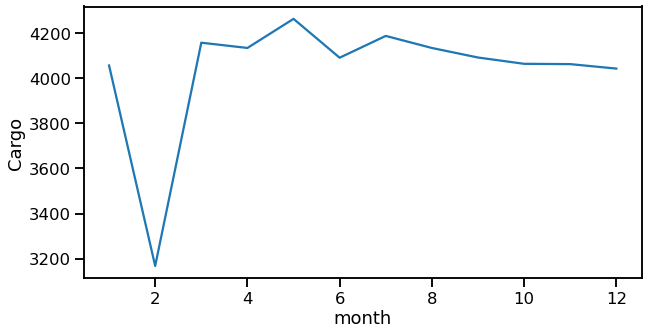

In [261]:
fig, ax = plt.subplots(figsize=(10, 5))
df_.groupby("month")['cargo'].mean().plot(ax=ax)
plt.xlabel("month")
plt.ylabel("Cargo")

In [262]:
df_['year'] = df_.index.year
df_.head()

,cargo,container,month,year
2007-01-31,2828.2,204.7,1,2007
2007-02-28,2512.5,181.0,2,2007
2007-03-31,2850.2,202.8,3,2007
2007-04-30,3027.7,220.1,4,2007
2007-05-31,3139.4,220.8,5,2007


In [263]:
df_.pivot(index=["month"],columns=["year"])['cargo']

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,,,,,
1,2828.2,3017.4,2324.2,3703.8,4163.2,4054.7,4836.4,4846.6,4643.6,4116.2,4587.9,4669.6,4810.7,4175.0
2,2512.5,2592.2,2157.0,2786.0,2953.2,3560.8,3434.3,3567.0,3634.4,3514.6,3763.0,3776.6,3472.1,2631.9
3,2850.2,3335.0,3076.2,3722.1,4027.6,4478.9,4763.2,4914.4,4219.1,4329.8,4995.9,4512.9,4938.6,4025.6
4,3027.7,3319.4,3022.6,3553.0,4021.9,4299.2,4565.7,4809.5,4432.0,4380.6,4782.6,4896.2,4637.8,4115.0
5,3139.4,3438.6,3279.3,3784.5,4351.8,4462.3,4824.5,4638.9,4277.8,4365.2,5029.5,5032.8,4732.4,4309.6
6,2938.4,3301.8,3093.6,3597.1,4095.5,4243.5,4406.7,4507.3,4322.6,4154.5,4787.2,4881.5,4637.3,4291.6
7,3062.2,3273.8,3223.6,3518.1,4530.9,4233.5,4682.6,4461.6,4447.1,4477.6,4707.4,4761.4,4567.8,4662.2
8,3029.0,3364.5,3115.8,3573.2,4020.5,3961.7,4519.9,4618.9,4484.0,4482.3,4994.7,4754.4,4409.9,4533.3
9,2909.9,3144.0,3327.5,3439.3,4034.4,4441.7,4546.4,4440.3,4254.0,4201.7,4624.2,4910.0,4452.3,4545.4


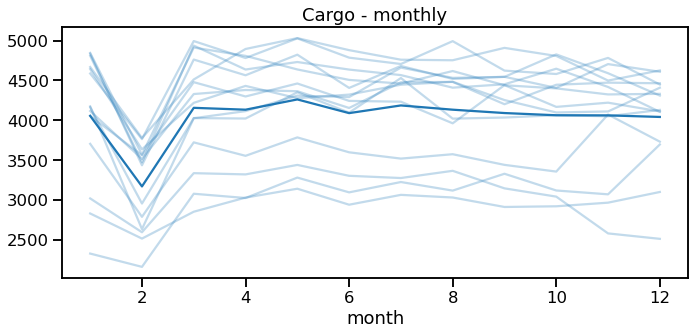

In [264]:
cmap = sns.color_palette("Blues", n_colors=5)

# 전체 데이터 월별 흐름 
fig, ax = plt.subplots(figsize=[10, 5])
(
    df_.pivot(index=["month"], columns=["year"])['cargo'].plot(
        legend=False, alpha=0.3, color=cmap[3], ax=ax
    )
)

# 평균선
(df_.groupby("month").mean(numeric_only=True)['cargo'].plot(ax=ax))

ax.set_title("Cargo - monthly")

plt.tight_layout()

### Detrend

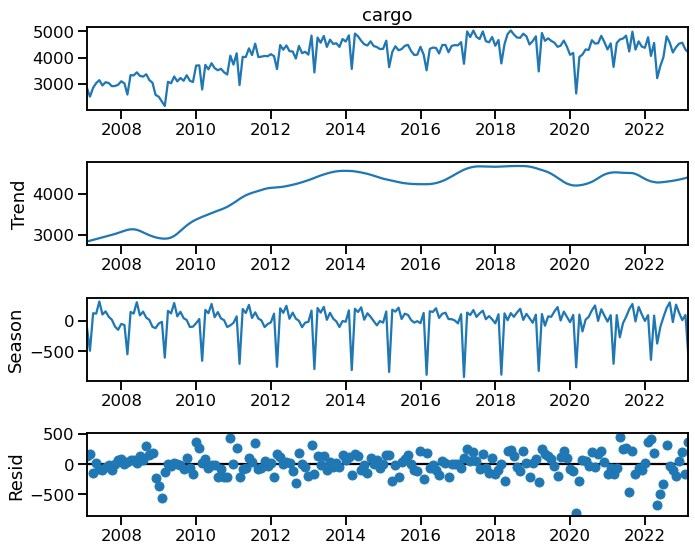

In [265]:
# Trend 가 존재하므로 Trend 제외 이후 분석
# STL 사용하여 추세제거
from statsmodels.tsa.seasonal import STL
stl = STL(df['cargo'],seasonal=13)
res = stl.fit()

plt.rc("figure", figsize=(10,8))
fig = res.plot()

### AutoCorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

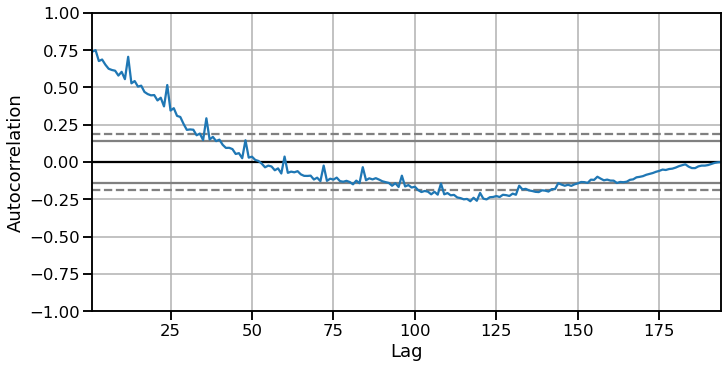

In [266]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
pd.plotting.autocorrelation_plot(df['cargo'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

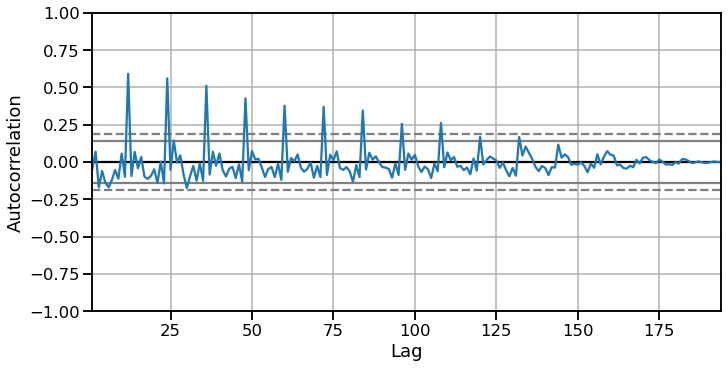

In [267]:
# detrend autocorrelation plot
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
detrend = res.seasonal + res.resid
pd.plotting.autocorrelation_plot(detrend)

(<matplotlib.patches.Rectangle at 0x1b0bf31dc40>,
 (<matplotlib.patches.ConnectionPatch at 0x1b0bf3475e0>,
  <matplotlib.patches.ConnectionPatch at 0x1b0bf347ee0>))

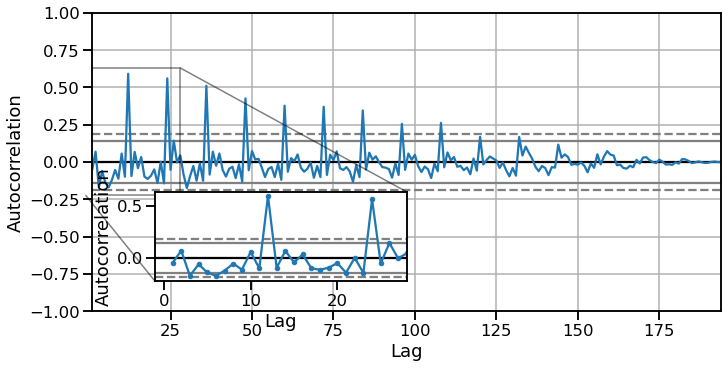

In [268]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
detrend = res.seasonal + res.resid
pd.plotting.autocorrelation_plot(detrend)
# 확대
ax_in = ax.inset_axes([0.1,0.1,0.4,0.3])
pd.plotting.autocorrelation_plot(detrend,ax=ax_in,marker='.')
ax_in.set_xlim(-1,28)
ax_in.grid(False)

# 확대부분
ax.indicate_inset_zoom(ax_in,edgecolor='k')

# Trend Feature: trend 변화 고려

Text(0.5, 1.0, 'Shanghai_Cargo')

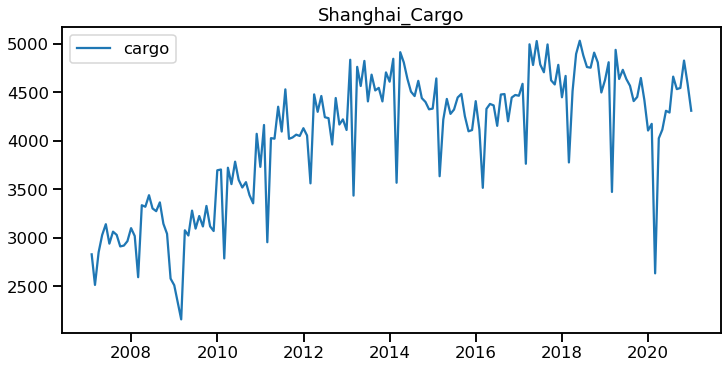

In [270]:
fig,ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df_.index, df_['cargo'],label='cargo')
ax.legend()
ax.set_title('Shanghai_Cargo')

## Trend extraction

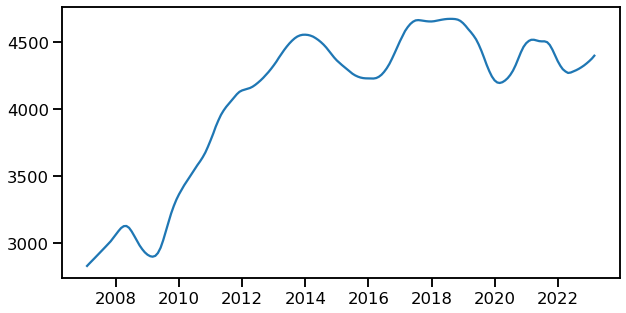

In [271]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res.trend.index, res.trend)

## Trial1: Lowess 
세세한 트랜드 스무딩을 위해 lowess 사용<br>
trend 를 뽑아 local min, local max 를 사용하여 trend가 변하는 날짜를 찾을 예정<br>
뽑힌 trend에서 local min, local max가 정확하게 뽑아질 수 있는지 여부가 중요<br>

In [272]:
# frac = 0.1
from statsmodels.nonparametric.smoothers_lowess import lowess
y = df_['cargo']
x = np.arange(0,len(y))
frac = 0.1
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
res[:10]

array([[0.00000000e+00, 2.83872516e+03],
       [1.00000000e+00, 2.86280973e+03],
       [2.00000000e+00, 2.88515344e+03],
       [3.00000000e+00, 2.90618138e+03],
       [4.00000000e+00, 2.92669344e+03],
       [5.00000000e+00, 2.94748224e+03],
       [6.00000000e+00, 2.96900327e+03],
       [7.00000000e+00, 2.99006730e+03],
       [8.00000000e+00, 3.00612516e+03],
       [9.00000000e+00, 3.02726191e+03]])

In [273]:
df_['lowess'] = res[:,1]
df_.head()

,cargo,container,month,year,lowess
2007-01-31,2828.2,204.7,1,2007,2838.725157
2007-02-28,2512.5,181.0,2,2007,2862.809731
2007-03-31,2850.2,202.8,3,2007,2885.153442
2007-04-30,3027.7,220.1,4,2007,2906.181385
2007-05-31,3139.4,220.8,5,2007,2926.693444


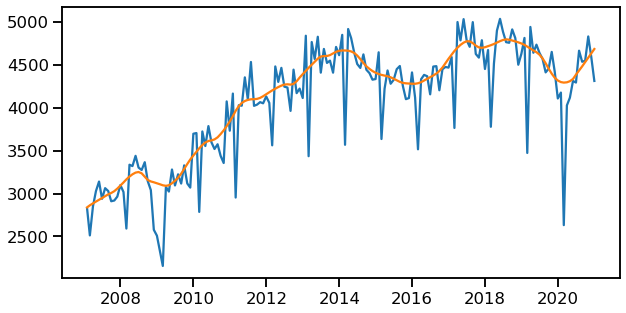

In [274]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')

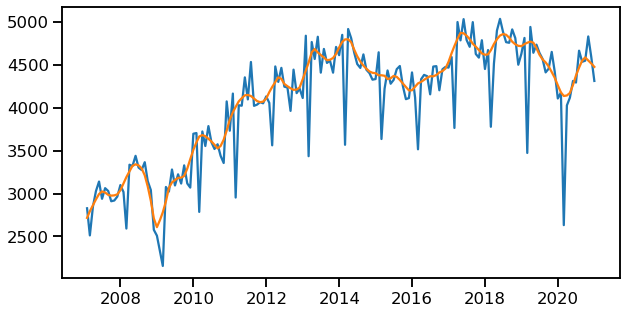

In [275]:
# frac 0.05 일때
frac = 0.05
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
df_['lowess'] = res[:,1]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')

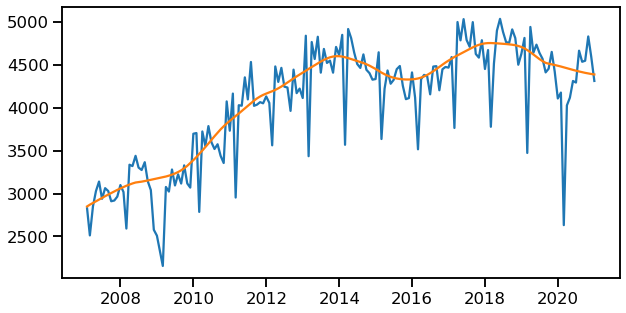

In [276]:
# frac 0.2 일때
frac = 0.2
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
df_['lowess'] = res[:,1]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')

In [277]:
from scipy.signal import argrelextrema
local_max_points = argrelextrema(np.array(df_['lowess']), np.greater)[0]
print(f"local_max points: {local_max_points}")

local_min_points = argrelextrema(np.array(df_['lowess']), np.less)[0]
print(f"local_min points: {local_min_points}")

local_max points: [ 82 133]
local_min points: [106]


In [278]:
change_points = np.concatenate([local_max_points,local_min_points])

Change points: 2013-11-30 00:00:00
Change points: 2018-02-28 00:00:00
Change points: 2015-11-30 00:00:00


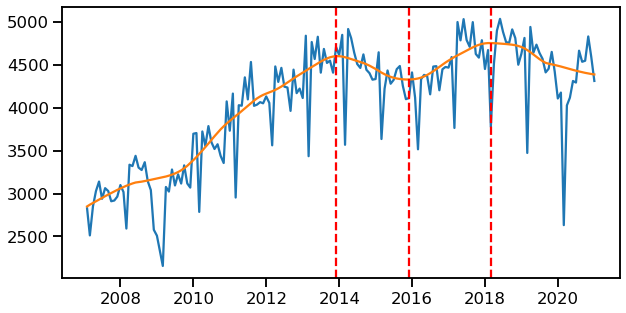

In [279]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')
 
for points in change_points:
    ax.axvline(x= df_.index[points], ls='--', color="r")
    c_date = df_.index[points]
    print(f"Change points: {c_date}")

## Change point detection 시도결과
* trend의 증가 감소는 잡을 수 있지만 같은 추세에서 기울기 변화는 잡을 수 없는 한계가 있음
* lowess의 경우 이상치에 robust 한 성질이 있어 추세변화점을 잡기에 좋지 않았음
* local min, local max가 잘 나오게 조절하려면 frac을 사람이 조절해줘야 하는 문제점이 있음
자동화 모델을 구축하기엔 한계가 있음

## Trial2: rolling
* 이동평균의 경우 이상치에 영향을 받아 조금 더 쉽게 change point를 찾을 수 있을 것이라 생각
* window 를 바꿔주면서 가장 잘 나타내는 점을 찾아보려함

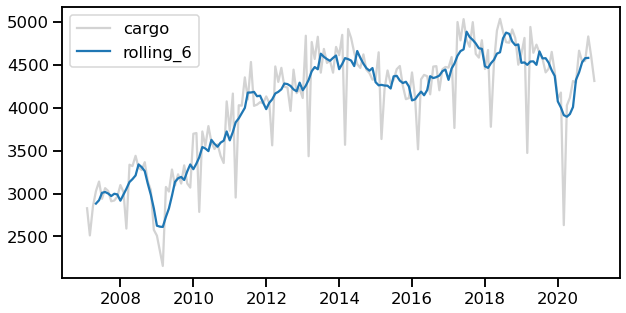

In [280]:
window = 6
df_rolling = df_.rolling(window=window,center=True).mean()

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(df_.index, df_['cargo'], label='cargo',color='lightgray')
ax.plot(df_rolling.index, df_rolling['cargo'], label=f'rolling_{window}')
ax.legend()

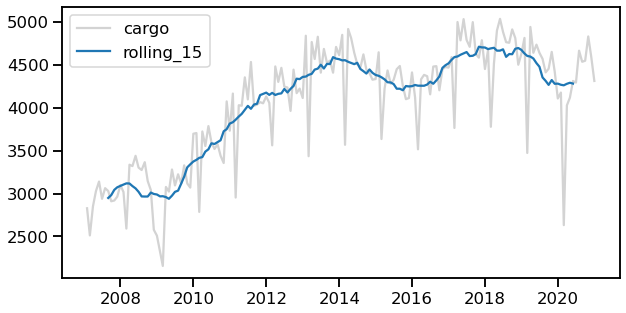

In [281]:
window = 15
df_rolling = df_.rolling(window=window,center=True).mean()

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(df_.index, df_['cargo'], label='cargo',color='lightgray')
ax.plot(df_rolling.index, df_rolling['cargo'], label=f'rolling_{window}')
ax.legend()

In [282]:
from scipy.signal import argrelextrema
local_max_points = argrelextrema(np.array(df_rolling['cargo']), np.greater)[0]
print(f"local_max points: {local_max_points}")

local_min_points = argrelextrema(np.array(df_rolling['cargo']), np.less)[0]
print(f"local_min points: {local_min_points}")

local_max points: [ 13  21  25  41  53  59  61  65  69  77  79  81  85  89  93 105 108 113
 125 129 134 137 139 142 153 155 159]
local_min points: [ 19  24  27  42  54  60  62  66  70  78  80  84  88  92 104 106 111 114
 126 132 135 138 140 152 154 157]


<AxesSubplot:>

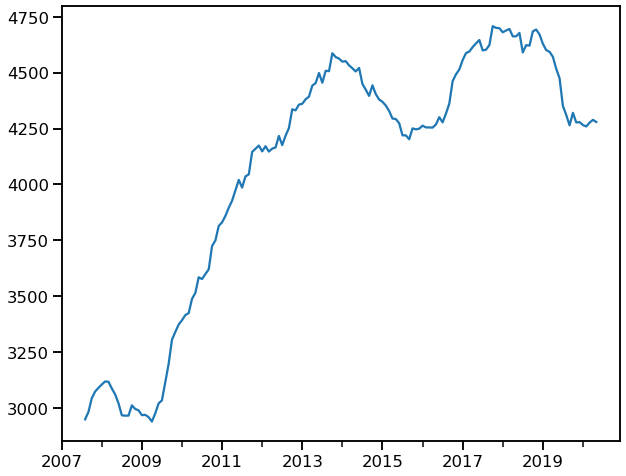

In [283]:
df_rolling['cargo'].plot()

<AxesSubplot:>

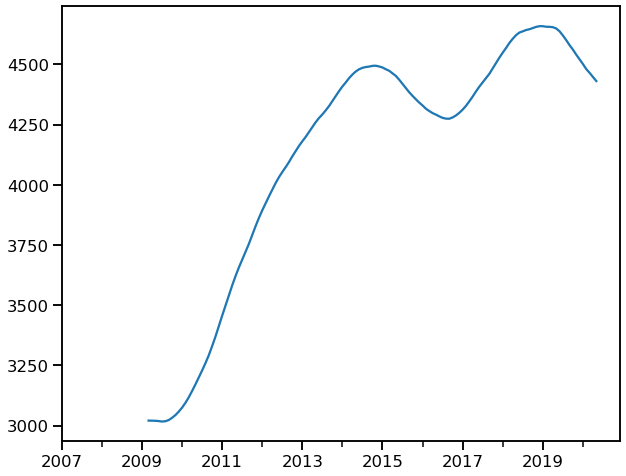

In [295]:
# re-smoothing
df_rolling2 = df_rolling['cargo'].rolling(window=20).mean()
df_rolling2.plot()

In [296]:
local_max_points = argrelextrema(np.array(df_rolling2), np.greater)[0]
print(f"local_max points: {local_max_points}")

local_min_points = argrelextrema(np.array(df_rolling2), np.less)[0]
print(f"local_min points: {local_min_points}")

local_max points: [ 94 143]
local_min points: [ 30 116]


Change points: 2014-11-30 00:00:00
Change points: 2018-12-31 00:00:00
Change points: 2009-07-31 00:00:00
Change points: 2016-09-30 00:00:00


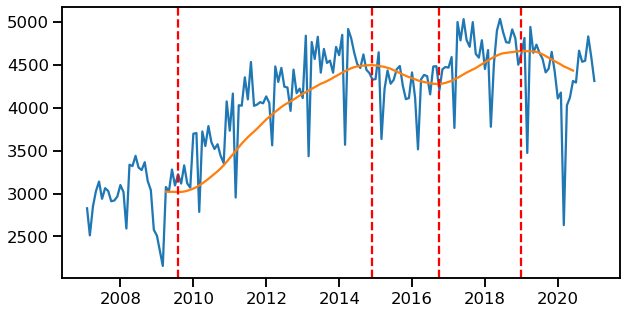

In [297]:
change_points = np.concatenate([local_max_points,local_min_points])
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_rolling2.index, df_rolling2,label='lowess_trend')
 
for points in change_points:
    ax.axvline(x= df_.index[points], ls='--', color="r")
    c_date = df_.index[points]
    print(f"Change points: {c_date}")

# Feature extraction

## lag feature

C:\Users\21ckw\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


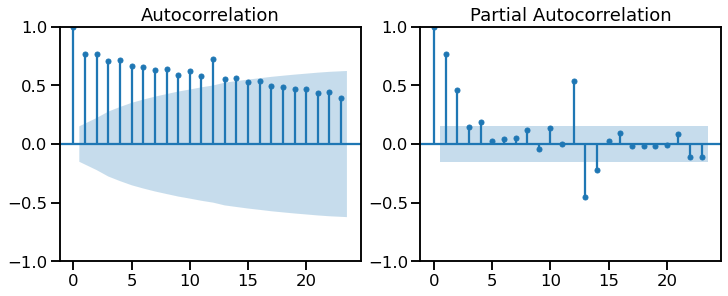

In [301]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axs = plt.subplots(ncols=2,figsize=(10,4),constrained_layout=True)
acf = plot_acf(df_train['cargo'],ax=axs[0])
pacf = plot_pacf(df_train['cargo'],ax=axs[1])

C:\Users\21ckw\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


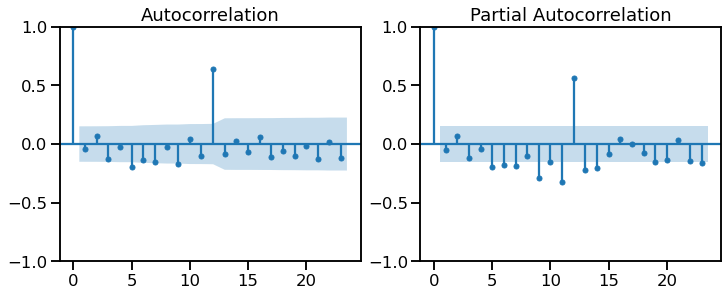

In [313]:
# detrend
res = seasonal_decompose(df_train['cargo'],extrapolate_trend=True)

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axs = plt.subplots(ncols=2,figsize=(10,4),constrained_layout=True)
acf = plot_acf(res.seasonal+res.resid,ax=axs[0])
pacf = plot_pacf(res.seasonal+res.resid,ax=axs[1])

## cyclical feature
월(1~12월)을 연속된 순환 feature로 변환 

## window feature